# Recurrent Neural Networks (RNNs) and Time Series

## Outline
* Part 1: CNNs for time series 
* Part 2: RNNs for time series classification
* Part 3: RNNs for time series regression

In this lesson we will focus on recurrent neural networks (RNNs) and time series. The lesson will include a lot of practical work, where you will dive deep into the different aspects of time series. The first part will consider how we can use CNNs for time series. After this we will switch to RNNs as they often tend to work better on time series data. We will use RNNs for two distinct tasks: time series classification and regression.

## Intro: Learning from Sequence Data

* Machine learning applications featuring sequence data include speech recognition, video processing, meteorological applications, machine translation, sentiment analysis, and named entity recognition, among others.
* For many of these applications, our input $x$ is a sequence in time: $x^{<1>}, x^{<2>}, ..., x^{<T>}$
* Order makes a difference:

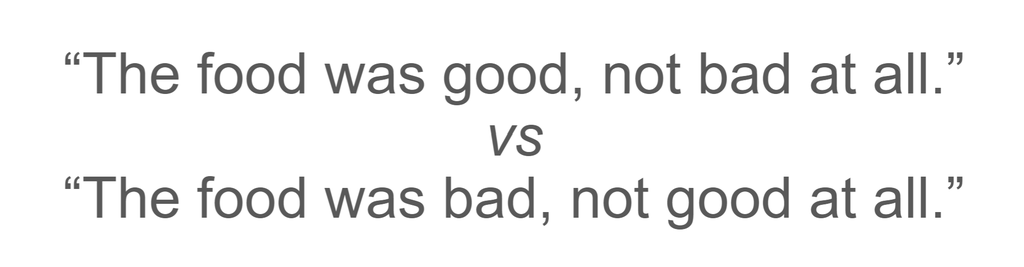

Let's start by discussing learning from sequential data. There are many cases where it is useful to learn from sequential data. For example, speech recognition, video processing, meteorological applications, machine translation, sentiment analysis, and named entity recognition, among others. For many of these applications, our input is a sequence in time - e.g. in speech recognition we have the voice as it evolves over time. As you may expect, the order of the inputs is important: consider for example the sentences "The food was good, not bad at all." and "The food was bad, not good at all".

## Time Series
A time series is a series of data points given in time order.

In standard machine learning:
* No specific ordering of the input data
* Data points are considered to be independent from each other

In time series analysis:
* A specific structure and dependency of the data, given by its chronological nature
* E.g. recent values are potentially more relevant than older ones for forecasting




We will now focus on time series data specifically as they are of key interest in this lesson.

## Example of a Time Series
Q: Can you appreciate any trends in the following data?
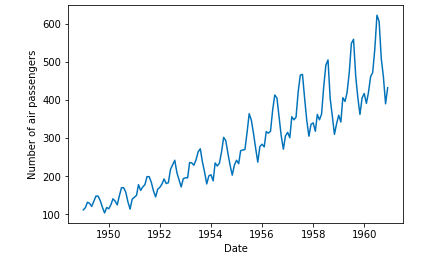

As an example look at the plotted time series - can you see any particular trends? It is clear that ignoring the time series structure in this example would lead to poor results.

## Standard ML Challenges
Standard ML could be applied to the example, ignoring the structure of the data and thus losing valuable information. For example:
* Set a window (for example of 10 days) that would make our input features.
* Output target could be predicting the amount of train passengers tomorrow.
* Build prediction model (e.g. linear regression/simple perceptron). 
* The regressor would receive 10 input features but it would not know that they follow a specific chronological order, missing thus that time is continuous. 

Time series analysis aims to fill this gap, building models that can specifically account for such structure and benefit from it.

We could try approaching time series data with standard, and relatively simple, ML approaches. However, standard machine learning would ignore the structure of the data and thus lose valuable information.

## Stock Forecasting
Task: Learn to predict the closing price $y$ of cryptocurrencies from a sequence vector $x$   
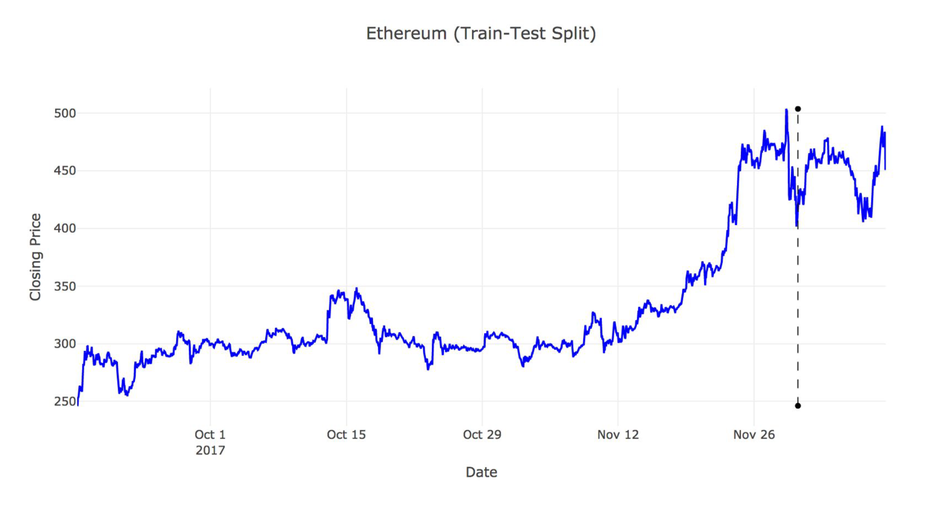

Before diving deeper into using neural networks for time series prediction, let's look at a few examples to show where these methods can make an impact.

One common time series task is that of stock price forecasting. In particular, we could want to learn to predict the closing price of cryptocurrencies from a sequence vector. Note that this is challenging: financial data is often unpredictable as you can see in the plot! There are lots of external factors to take into account...

## Named Entity Recognition
Task: Learn to predict if a word in a sentence $x$ is a named entity ($y = 1$) or not ($y = 0$)
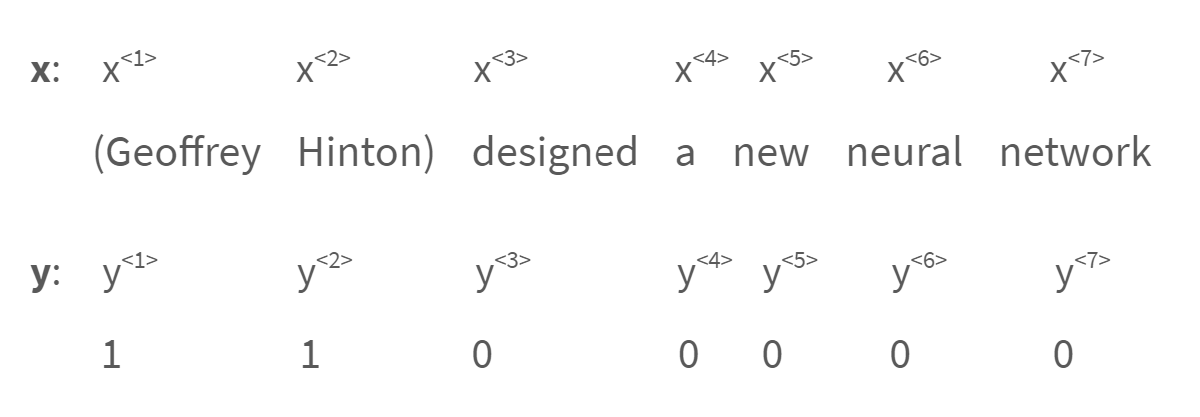

Another example task that we can do with sequential data is named entity recognition. The task is to learn to predict if a word in a sentence is a named entity or not. For example, the sentence could be "Geoffrey Hinton designed a new neural network". In this case both the words "Geoffrey" and "Hinton" are named entities, while the rest of the words are not. In case you are wondering - the features are word embeddings in this case.

## Speech Recognition
Task: Learn to transcribe a segment of audio $x$ into a sentence $y$
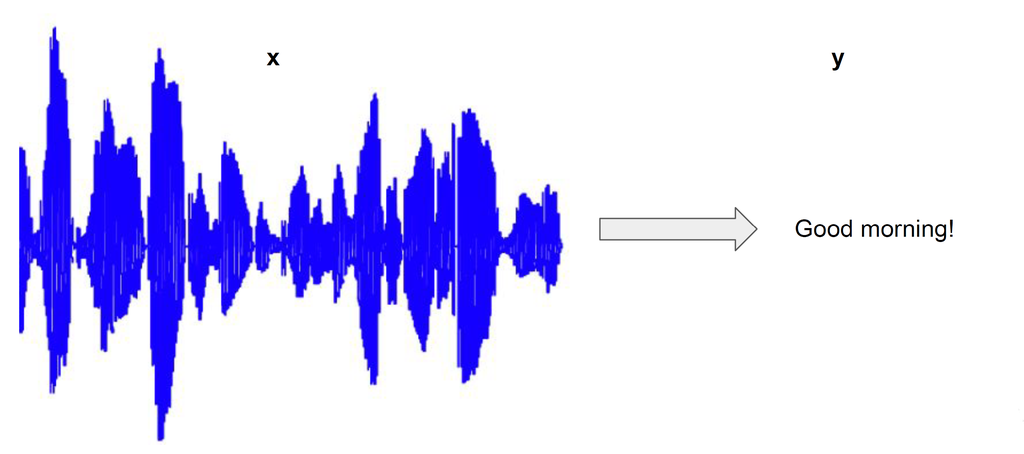

Further, we may want to learn to transcribe a segment of audio into a sentence. This is an example from speech recognition, which also has its own challenges: detect word/phoneme boundaries in speech data, match audio information to textual information.

## Recurrent Neural Networks
* Recurrent neural networks (RNNs) are often the model of choice for sequence data
* The notebooks will focus on using CNNs and RNNs for time series prediction

Having covered various problems with sequential data, we are ready to start looking into what kinds of neural networks could handle them well. Recurrent neural networks (RNNs) are often the model of choice for sequence data, however, we can also use CNNs for this task. Within the practical part of this session we will work with both on time series data.

## CNNs vs. RNNs for Time Series Prediction

RNNs:
1. Can capture long-range dependencies between elements of the input sequence
2. Difficult to parallelize
3. Vanishing/exploding gradients for some architectures

CNNs:
1. Dependency range dictated by the kernel width
2. Computation easily parallelized
3. Relatively stable gradients (although depends on depth)

You may be wondering - how do CNNs and RNNs actually compare for time series prediction?

RNNs can capture long-range dependencies between elements of the input sequence, but are difficult to parallelize and we may meet vanishing/exploding gradients for some architectures. On the other hand, for CNNs the dependency range is dictated by the kernel width, but the computation is easily parallelized and the gradients are relatively stable (although this depends on depth).

## Working in Batches - Sequences of Varying Length
* Training on sequences of varying length can be problematic
* One solution is to pre-pad the training sequences:
$$[1, 2, 3, 4] \rightarrow [1, 2, 3, 4]$$
$$[1, 2, 3] \rightarrow [0, 1, 2, 3]$$
$$[1] \rightarrow [0, 0, 0, 1]$$
* Another solution is to partition the input into batches of fixed length:
$$[x^{<1>}, ..., x^{<10>}], [x^{<11>}, ..., x^{<20>}], ..., [x^{<91>}, ..., x^{<100>}]$$

The sequential data may not always be nicely aligned - so we need to take care of sequences of varying length. The reason is that the CNN model is fixed and it requires input that is always of the same shape.

There are two main solutions to this (both shown on the slide):

1) we can pre-pad the training sequences with zeros, or

2) we can partition the input into batches of fixed length - we will use this second solution in the practical part of the lesson.

The main benefit of the partitioning approach is that our inputs do not have empty parts at the beginning. In any case, which one to use depends on the specific data at hand and it is useful to consider what the resulting batches will look like.

## CNNs for Sequences: Convolutions in 1D

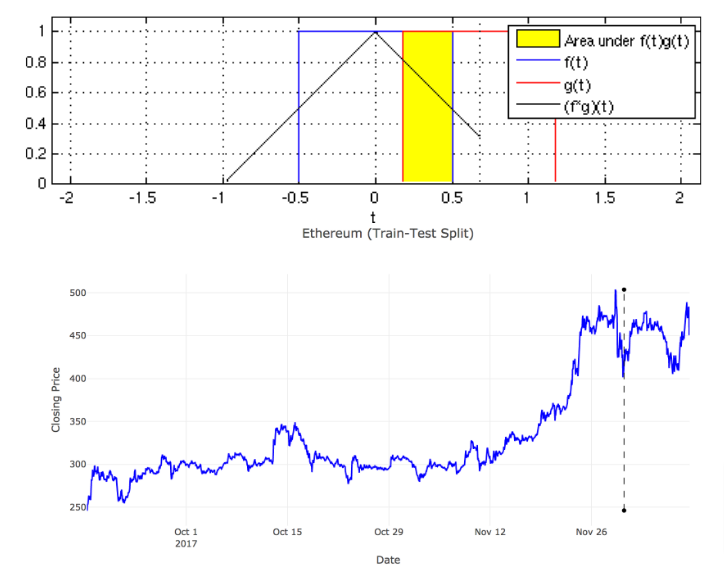

* We obtain large output values when our feature detector (red square) overlaps with our signal (blue square)
* The width of the red square is known as the kernel width
* We want to learn the shape of the feature detector that best predicts our output $y$ when we slide it over our time series
* We do this via back-propagation in the CNN 


Let's discuss how we can actually use CNNs for sequences - or how to do convolutions in 1D. We will use a feature detector that will move across parts of the input signal - in our case the example input signal can take values between 0 and 1 (we can obtain such values after normalization). We obtain large output values when our feature detector overlaps with our signal.

The feature detector is represented by the red square on the illustration, while the signal is represented by the blue square. The signal is equal to 1 when the time is between -0.5 and 0.5, and otherwise the signal is 0. The black line describes the size of the overlap between the feature detector and the signal at a given time. The width of the red square is known as the kernel width.

We want to learn the shape of the feature detector that best predicts our output when we slide it over our time series. We do this learning via back-propagation in the CNN.

## How Good is My Classifier?
* We have 100 data points ($x, y$) in our test set which describe credit card transactions and indicate whether they are fraudulent or not
    * 10 of the data points are fraudulent ($y = 1$)
    * 90 of the data points are not fraudulent ($y = 0$)
* If our classifier predicts that every transaction is not fraudulent we predict 90/100 cases correctly and achieve an test set accuracy of 90%
* Is this a fair performance metric? Why?


## The ROC Curve
Idea: Let's find a metric that's invariant to the number of instances of each class

We plot the True Positive Rate (**TPR**) against the False Positive Rate (**FPR**).

**TPR** = Positives we predicted **correctly** / Total number of positives

**FPR** = Positives we predicted **incorrectly** / Total number of positives

We want to find a metric that's invariant to the number of instances of each class. In particular, we can look at the positives that we got right out of the total positives (true positive rate) - this should be large - and we can compare it with the negatives that we got wrong out of the total negatives (false positive rate) - this should be small.

A curve showing the true positive ratio against the false positive ratio is called the receiver operator characteristics (ROC) curve.

Now predicting 90 true positives out of 100 positive labels has equal cost to getting 9 false negatives out of 10 negative labels. We have removed the dependency on the total number of instances of either class.

## A Good Metric: The AUC
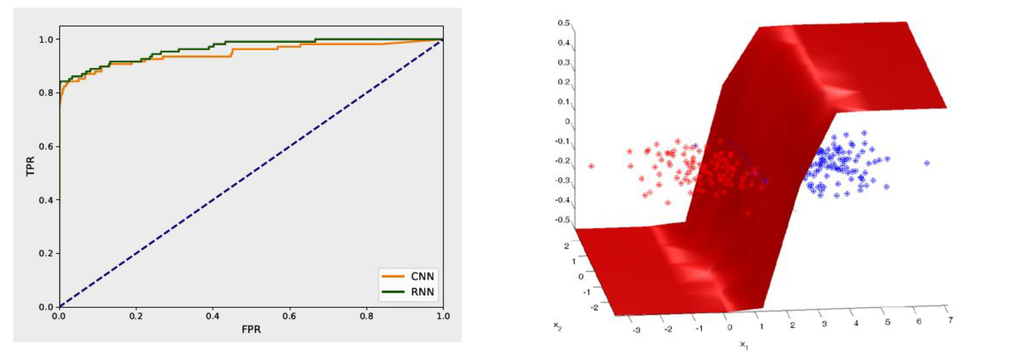
* By computing the area under the ROC curve (AUC) we average over all choices of decision threshold
* As such, the AUC offers a clean assessment of how good our model is

A good metric to capture the behaviour that we have just discussed is the area under the ROC curve (AUC) where we average over all choices of the decision threshold. As such, the AUC offers a clean assessment of how good our model is.

The picture of the logistic classifier illustrates that we're changing the decision threshold along the red 2D sigmoid. Computing the AUC tells us how good the position and orientation of our logistic function is by averaging over all decision thresholds. Thus we can compare different positions and orientations (models) via the AUC.

## RNNs - Dynamical Systems
* RNNs can be viewed as dynamical systems: in each step $t$ we use function $f$ to move to the next state
    * The function $f$ is represented by weights $W$
    * We assume the function always stays the same

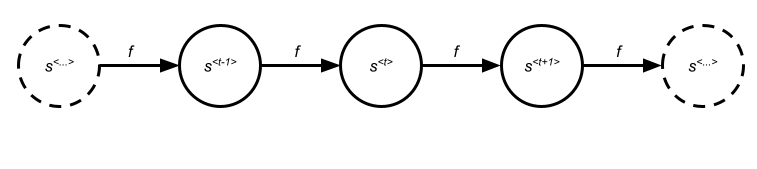

The next key part of the lesson is to actually introduce recurrent neural networks and discuss them in more depth. Let's start from the basics. RNNs can be viewed as dynamical systems: in each step $t$ we use function $f$ to move to the next state. The illustration shows how we can move between different states by using function $f$. The function $f$ is represented by weights $W$ - these weights basically represent out model. We assume the function always stays the same during a pass through the example - e.g. time series or a sentence.

## RNNs - Folded and Unfolded Representations
* RNNs can be represented using folded and unfolded computational graphs

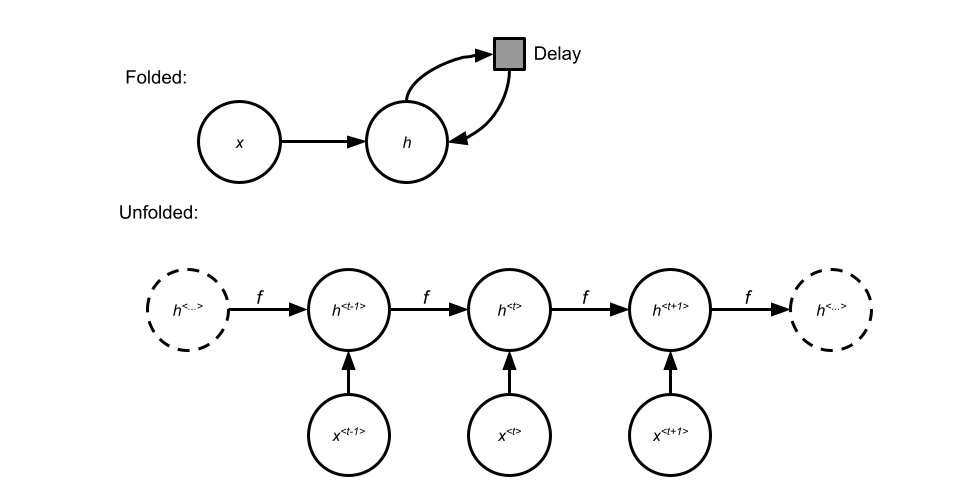

We can represent RNNs using folded and unfolded computational graphs. The folded version is more compact and perhaps more intuitive: we have some input, which is then passed to the current hidden state. At the next step (delay), we will use the new hidden state. This is why we call these neural networks recurrent - the current hidden state depends on the previous hidden state. The unfolded representation allows us to look at the process in more depth and makes it easier to implement the approach as a ML model.

## RNNs - Folded and Unfolded Representations
* The states $h^{<t>}$ are not visible - they are hidden representations
    * They work as a memory, and compress the information from the history
* The new state is $h^{<t>}=f(h^{<t-1>}, x^{<t>}; W)$
* If there are $t$ states - $t$ inputs, RNN can be viewed as a $t$-layer neural network with shared weights
    * We back-propagate through this $t$-layer unfolded network

The states $h$ are not visible - they are hidden representations. They work as a memory, and compress the information from the history. The new state is computed using the previous state, the current input, and the weights $W$ that govern how we move to the new state. If there are $t$ states - which is the case when there are $t$ inputs, RNN can be viewed as a $t$-layer neural network with shared weights. We back-propagate through this $t$-layer unfolded network.

## Recurrent Neural Networks
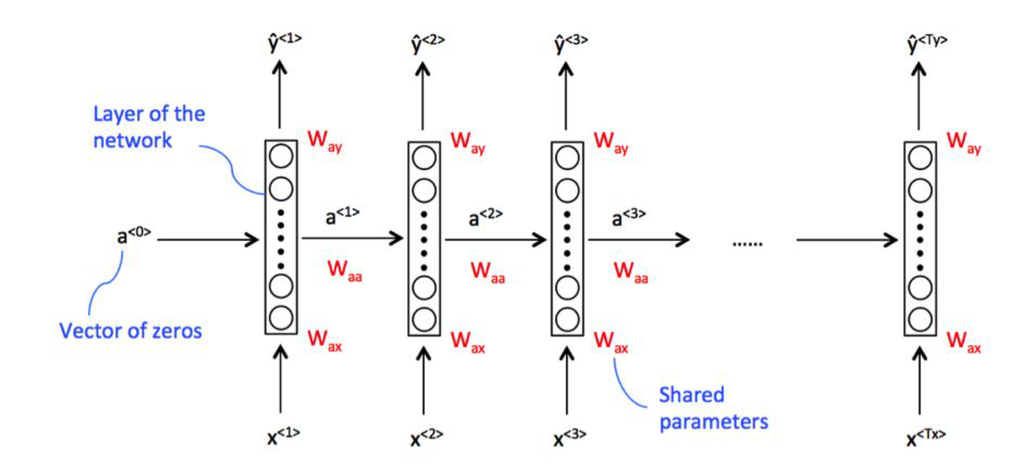

Now we are ready to look at RNNs in more detail to see how they work. In the slide you can see an unfolded representation that uses the same shared weights (parameters) in each layer. Each layer corresponds to one input and one output. Initially we get a vector of zeros for the hidden state, but this then changes as we process new inputs.

## What does $x$ Look Like?
$x$: King, man, Queen, woman $ \rightarrow  [0.4, 0.8], [0.3, 0.3], [0.8, 0.5], [0.5, 0.1]$

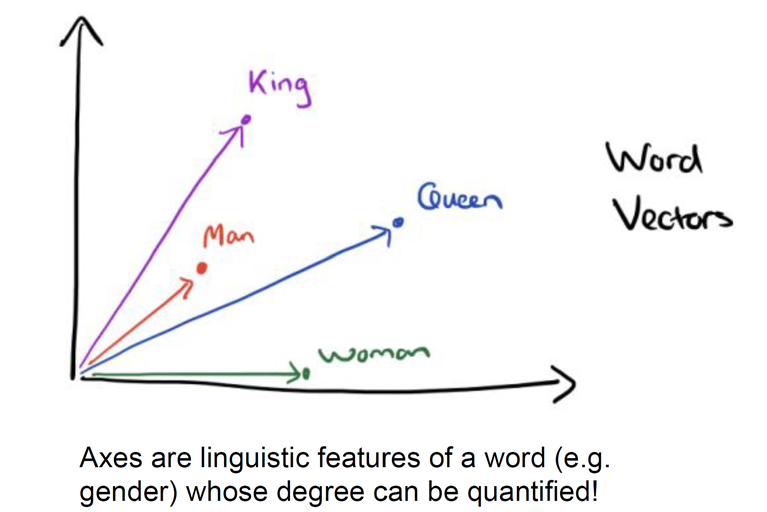

A really good question to ask is what do we actually get as inputs? Surely it cannot be just the words themselves. In fact, we take the word embeddings (e.g. obtained using word2vec) and then use these embeddings as inputs. The embeddings have some really fascinating properties: for example if you add the difference between "king" and "man" and add it to "woman", you get the word embedding for "queen". Of course, in many cases it does not work so well, but you get the picture that the word embeddings are a reasonable representation to use.

## Back-Propagation for RNNs
* RNN vs conventional NN: RNN can be viewed as a $T$-layer neural network with shared weights for a sequence of $T$ inputs
* We can unfold the graph and sum the derivatives for each weight as we pass through the different states
* Caching the outputs and errors at each step improves efficiency
* Alternatively we can back-propagate only through a selection of states (e.g. 25 instead of 1000)

We have seen what RNNs look like and also what the data are - but how can we train them? Similar to before, we can use back-propagation. For a better intuition of how back-propagation works for RNNs, we will interpret them in terms of conventional neural networks. RNN can be viewed as a $T$-layer neural network with shared weights for a sequence of $T$ inputs.

For the training itself, we can unfold the graph and sum the derivatives for each weight as we pass through the different states. This is often quite slow, so to speed it up, we can cache the outputs and errors at each step. Alternatively we can back-propagate only through a selection of states (e.g. 25 instead of 1000).

## RNN Architecture Types
Various architecture types available:
* One to one
* One to many
* Many to one
* Many to many

The choice depends on what task you want to do!

There are various types of architecture available for RNNs: one to one, one to many, many to one, and many to many. The choice depends on what task you want to do! We will look at the different cases and illustrate what the architecture looks like.

## A Vanilla Neural Network in RNN Notation
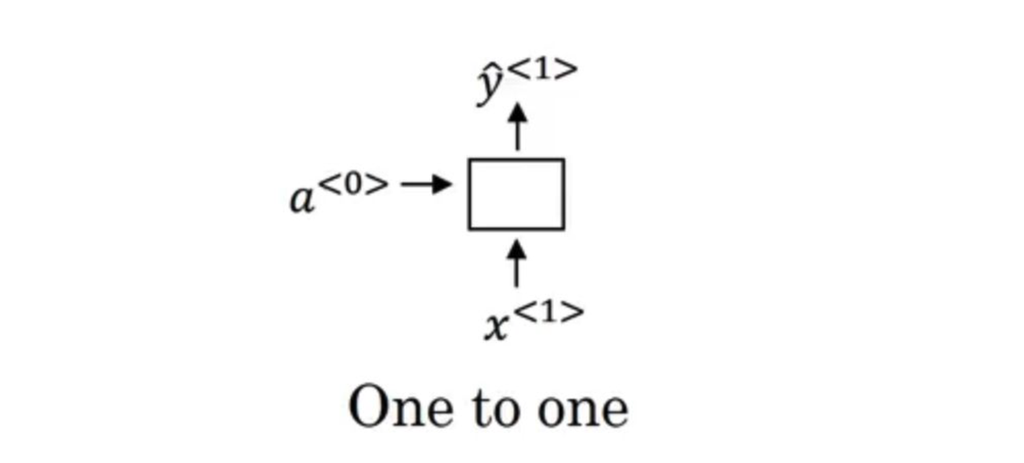

The simplest architecture is one to one, it is more of a toy example to explain the notation rather than actually used in practice. $x$ represents the current input, $\hat{y}$ represents the output, and $a$ is the initial state.

## Music Generation
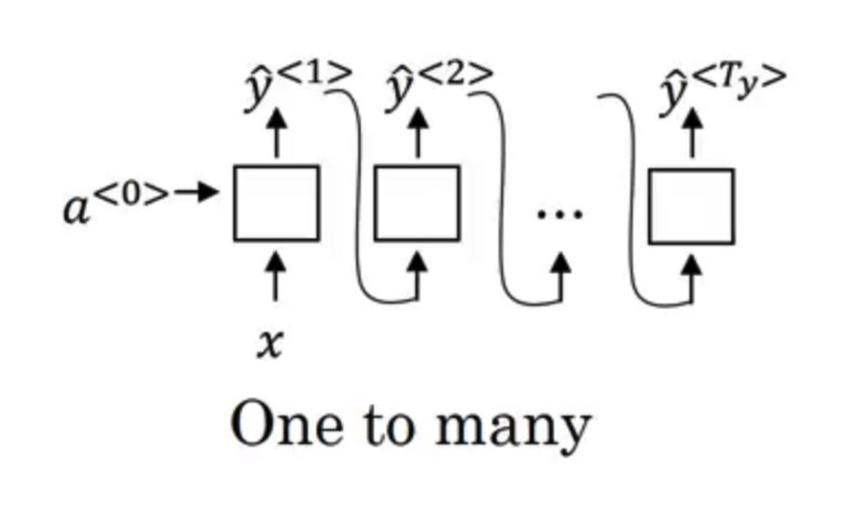

One to many is a more useful architecture as it can be used, for example, for music generation. We get one input and then we transform the outputs many times in a row to generate music.

## Sentiment Analysis
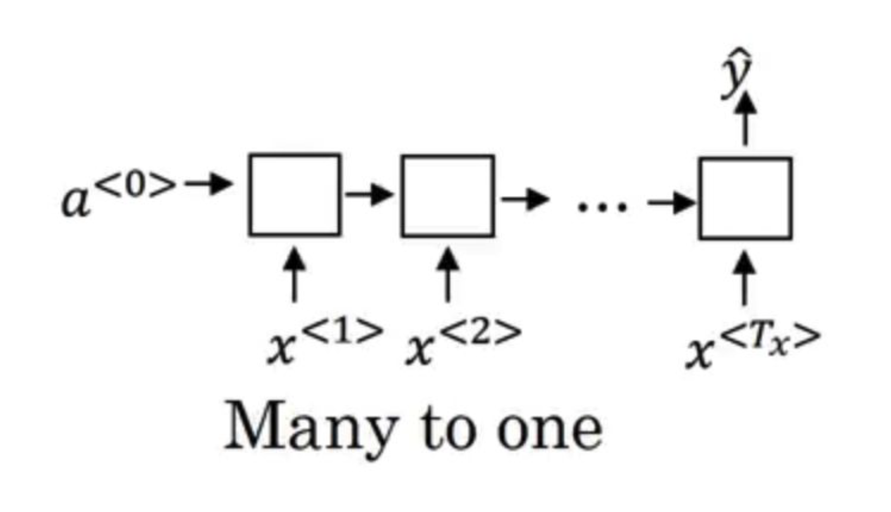

For sentiment analysis we get many inputs (the sequence of words) and one output (the sentiment measure).

## Named Entity Recognition
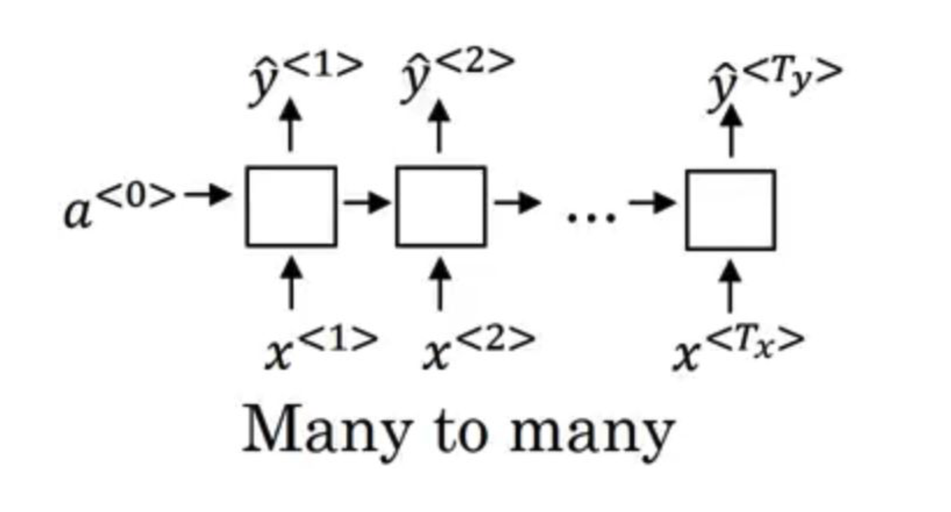

We can also have the many to many RNN architecture type. For example for named entity recognition we have a sequence of words as the input, and then for each word we predict if it is a named entity or not.

## Machine Translation
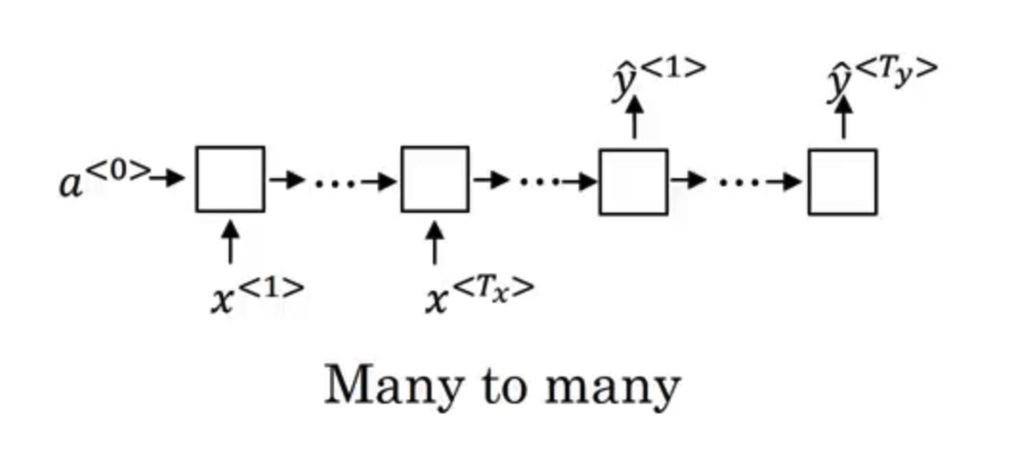

The RNN architecture types as we have discussed them do not need to look exactly the same if they belong to the same category. For example, in many to many, we can do it in several ways. In machine translation in particular we need to encode the entire sentence $x$ before we can begin to translate it to $y$.

## Sequence to Sequence (seq2seq) Models


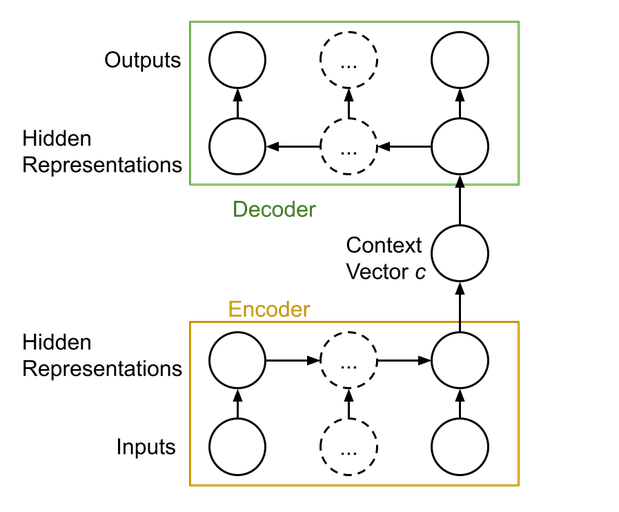

* Common RNN architecture for many to many learning
* The inputs are converted into a context vector $c$ using an **encoder**
* The context vector is then converted into an output sequence using a **decoder**
* Often used for machine translation

A common approach for implementing the many to many RNN approach is called sequence to sequence (seq2seq). For this approach, the inputs that come as a sequence are converted into a context vector $c$ using an encoder, and then the context vector is converted into an output sequence using a decoder. We can see this process in the diagram on the slide. Seq2seq models are often used for machine translation given that both the inputs and outputs are both sequences.

## Bidirectional RNNs
* Bidirectional RNNs allow information to be drawn from both the **previous** and **next** elements of the input sequence at a particular time-step
    * Previous and next: two directions
* Implemented by combining an RNN going forward in time and another going backward in time
* In the following segment, information from the future is required to identify the word "Teddy" as constituting a named entity or not 
    * He said "Teddy...
    * He said "Teddy bears are on sale"
    * He said "Teddy Roosevelt is here"

RNNs do not need to have one direction only. In fact, they can be bidirectional. Bidirectional RNNs allow information to be drawn from both the previous and next or future elements of the input sequence at a particular time-step. The fact that we use both previous and next elements means we use two directions, hence the name bidirectional. In practice bidirectional RNNs are implemented by combining an RNN going forward in time and another going backward in time.

## Deep Networks: Vanishing and Exploding Gradients

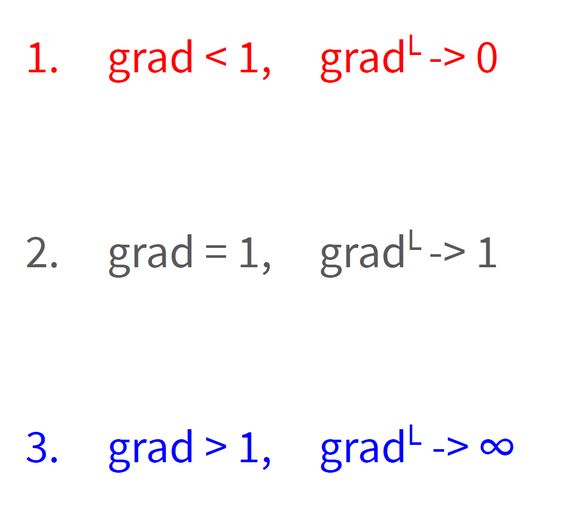

* Vanishing and exploding gradients are a problem for deep networks
* Updates to weights in early layers of a deep network are computed by multiplying gradients from later layers
* If these gradients are consistently smaller or larger than 1 it can cause vanishing and exploding gradients respectively

RNNs are typically very deep networks as we unfold the computational graph. Training very deep networks has several challenges, such as vanishing and exploding gradients.

The reason is that updates to weights in early layers of a deep network are computed by multiplying gradients from later layers. If these gradients are consistently smaller or larger than 1 it can cause vanishing and exploding gradients respectively.

## Vanishing Gradients in RNNs
Vanishing gradients in RNNs can limit the ability of the network to learn long-range dependencies between components of the input sequence e.g. in the following sentence:
* The man whose dog had been found by the beach offered a reward...

Although there is a dependency between "man" and "offered", this relationship will be difficult to capture with a vanilla RNN.

## Solutions to Exploding and Vanishing Gradients
Modifications to the optimization algorithm:
* Gradient clipping - restrict the gradient values to selected range
* Gradient normalization - rescale the gradients by considering the average magnitudes

Other options:
* Choose a different type of RNN units - e.g. LSTM

We have seen that there are these problems with RNNs, but fortunately we have tools to handle these issues.

We can consider modifications to the optimization algorithm: 1) gradient clipping where we restrict the gradient values to a selected range, and 2) gradient normalization where we rescale the gradients by considering the average magnitudes.

More commonly people solve or alleviate the issue by changing the type of RNN unit - in particular, we can use an LSTM unit, which we will discuss next.

## The Long Short-Term Memory Network (LSTM)
* LSTMS were introduced by Hochreiter and Schmidhuber as a means of circumventing the vanishing gradient problem in RNNs
* The efficacy of LSTMs in learning long-range dependencies is due to the introduction of a memory cell that allows values to be stored for many time-steps
* LSTMs allow the neural network to selectively remember and forget information, and introduces gates that regulate the flow of information (i.e. adding and removing information)

## LSTM - Architecture
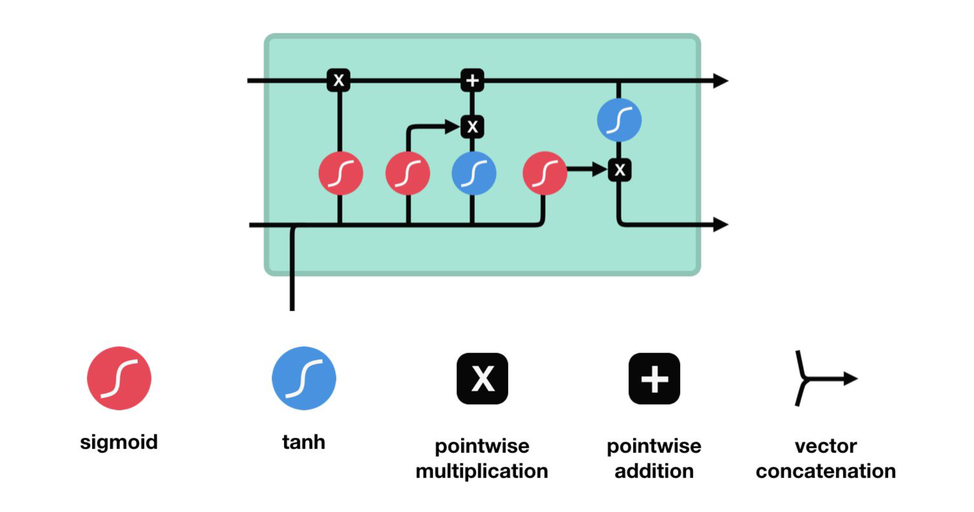

An LSTM unit has several parts, which are various operations connected together - sigmoid, tanh, pointwise multiplication and addition, and vector concatenation. Sigmoid takes values between 0 and 1 so it is good for updating or forgetting data. Tanh is used for regulating values flowing through the network as it squashes all of them into the range -1 to 1. You can see a diagram of LSTM on the slide.

## LSTM - Gates

* Cell state (memory) combines the previous cell state and the incoming signal
* Forget gate controls how much of the previous cell state goes to the cell state
* Input gate controls how much of incoming signal goes to the cell state
* Output gate controls what the new hidden state will be 

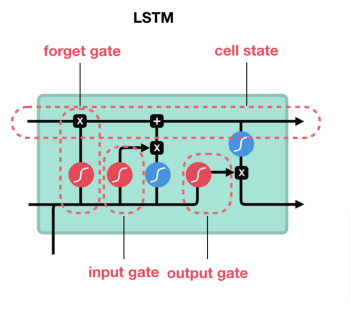

Let's now discuss the different parts of LSTM. Cell state (which works as the memory) combines the previous cell state and the incoming signal. The forget gate controls how much of the previous cell state goes to the cell state. The input gate controls how much of the incoming signal goes to the cell state. The output gate controls what the new hidden state will be.

## Gated Recurrent Units (GRU)

* The GRU is the newer generation of recurrent neural networks and is similar to an LSTM
* GRU gets rid of the cell state and uses the hidden state to transfer information
* It has only two gates, a reset gate and update gate

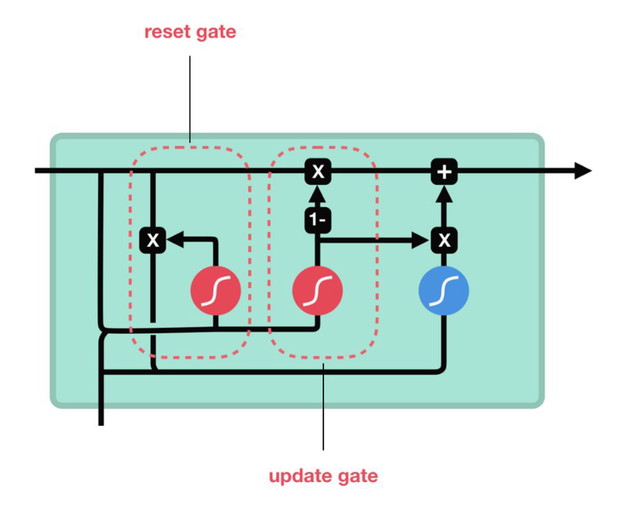

A newer and simpler alternative to LSTM is the gated recurrent unit (GRU). A GRU is similar to an LSTM, but it gets rid of the cell state and uses the hidden state to transfer information. It has only two gates, a reset gate and an update gate - as you can see on the slide.

## Attention Mechanism

* Mechanism for seq2seq RNN models to give more priority to the most relevant words in the source sentence
* Relevance is computed using a small feed-forward neural network that considers the decoded hidden representations (from the previous state) and the current encoded hidden representations
* Significant improvements on the machine translation task

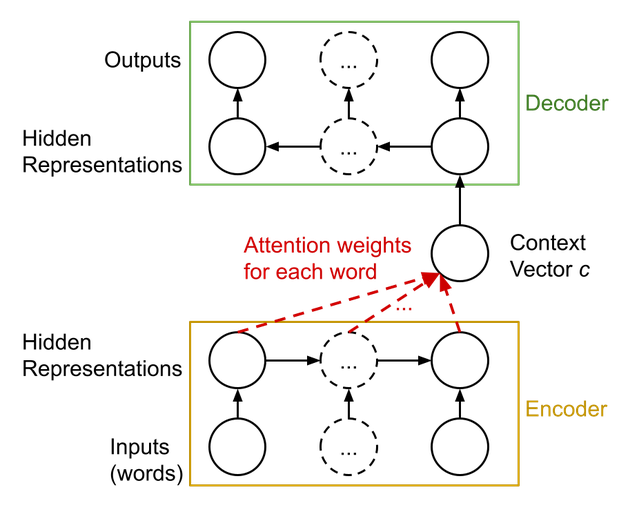

A very useful technique in the area of RNNs is the attention mechanism. The mechanism is typically used for seq2seq RNN models and it gives more priority to the most relevant words in the source sentence. The relevance is computed using a small feed-forward neural network that considers the decoded hidden representations (from the previous state) and the current encoded hidden representations. The attention mechanism has led to significant improvements on the machine translation task, but it can be useful also in other applications.

In the diagram, you can see that the inputs are transformed into hidden representations using an encoder, and then these hidden representations are weighted using attention mechanism to create a context vector - the attention mechanism specifically refers to the part in red. Once we have the context vector, we take the hidden representation and transform it into real words.

## Other Applications of RNNs
In chemical reaction prediction, molecules can be represented as text and RNNs used to predict the outcomes of reactions: https://www.youtube.com/watch?v=7DVu9ZKPUws

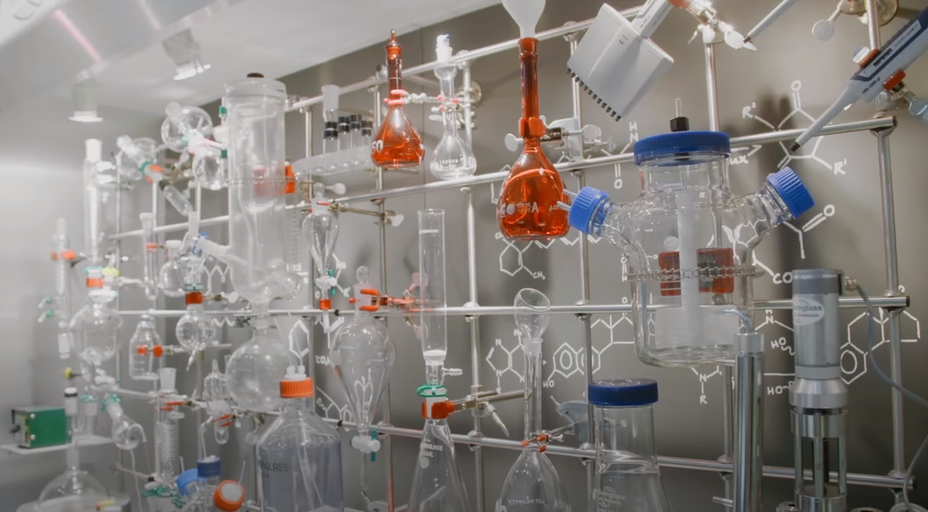

## Practical Considerations (I)
* Always start building a very simple baseline. This can include the random classifier and a simple linear classifier/regressor (not necessarily a NN).
* Start simple and build up complexity to see what improves a simple network.
* Set a hyper-parameter grid search and include some architecture hyper-parameters (e.g. number of neurons per layer, activation functions...). Check what works best. 
* Do you have structured data? Images, genomes, text, time series, graphs... Look for those specific models. 
* Try varying depths of network. Do they overfit with more epochs? If not, you can usually continue adding capacity. 
* Does the network learn or do you suffer from vanishing gradients? If so, try resnets, batchnorm, etc.

## Practical Considerations (II)

There are many rule-of-thumb methods for determining the correct number of neurons to use in the hidden layers, such as the following:

The number of hidden neurons should be
* between the size of the input layer and the size of the output layer
* 2/3 the size of the input layer, plus the size of the output layer
* less than twice the size of the input layer

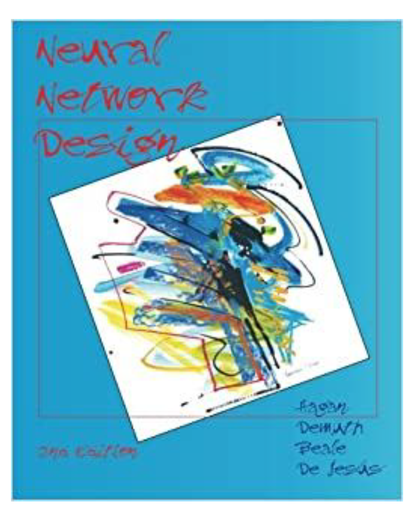

## Practical Considerations (III)
* If it overfits, you can test regularization strategies (batchnorm, weight decay, dropout) to see if you can improve on generalization (always the end goal!). These are generally recommended. Dropout and weight decay don't add much computational time (as opposed to batchnorm) so they are a good place to start!
* Can you start from a pretrained model? (e.g. VGG)
* Remember there are no one-size-fits-all answers to the question of what architecture is best. There are books on neural network design with more than 1000 pages!
